# Import Libraries

In [1]:
!pip install tensorflow==2.13.0 keras==2.13.1


  Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
  Using cached protobuf-4.25.5-cp38-cp38-win_amd64.whl.metadata (541 bytes)
Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl (14.9 MB)
Using cached protobuf-4.25.5-cp38-cp38-win_amd64.whl (413 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.2
    Uninstalling protobuf-3.20.2:
      Successfully uninstalled protobuf-3.20.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.13 requires numpy<2,>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.13 requires typing-extensions>=4.9.0, but you have typing-extensions 4.5.0 which is incompatible.
albumentations 1.4.10 requires numpy<2,>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albumentations 1.4.10 requires typing-extensions>=4.9.0, but you have typing-extensions 4.5.0 which is incompatible.
paddlepaddle 2.6.2 requires protobuf<=3.20.2,>=3.1.0; platform_system == "Windows", but you have protobuf 4.25.5 which is incompatible.


In [2]:
!pip show tensorflow
!pip show keras

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\silwa\.conda\envs\daks\lib\site-packages
Requires: tensorflow-intel
Required-by: retina-face
Name: keras
Version: 2.13.1
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: c:\users\silwa\.conda\envs\daks\lib\site-packages
Requires: 
Required-by: tensorflow-intel


In [3]:
!pip install wordcloud 

In [4]:
# # !pip install wordcloud
# import sys
# print(sys.executable)

In [5]:
import tensorflow as tf
import string
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

os.environ["SM_FRAMEWORK"] = "tf.keras"

# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import TruncatedSVD
# from sklearn.preprocessing import OneHotEncoder,LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

from tensorflow.keras.preprocessing.text import Tokenizer

# Read text file

In [6]:
poem_file = open('data/poem.txt','r')
poem = poem_file.read()

In [7]:
poem

'नछाडी जानोस् हे मेरा प्राण ! अकेली मलाई,\nमनको वनमा ननिभ्ने गरी विरह जलाई !\nननिभ्ने गरी विरह जलाई,\nलोचनका तारा ! हे मेर प्यारा ! यो जोति  बिलाए !\nके भनूँ? भन्ने म केही थिइन  विष नै पिलाए !\nप्यारा ! विष नै पिलाए !\nमनको कुरा गलामा अड्छ, अड्कन्छ गलामा,\nयो मेरो मुटु पचासबाजी धड्कन्छ पलामा ।\nयो छाती मेरो चिरेर खोली नजर गराए,\nत्यो मन केही फर्कंदो होला, तस्विर खुलाए\nआँसुमा खस्छ मनको टुक्रा यो आँसु बोल्दैन,\nमनको कुरा मनमै बस्छ, छातिले खोल्दैन,\nप्यारा ! आँसुले बोल्दैन !\nहे मेरी मुना ! नभन त्यसो, जूनमा फुलेकी !\nफर्कन्छु फेरि म चाँडै भन्ने किन हो भुलेकी ?\nम बीसै दिन बसुँला ल्हासा, बाटामा बीसै दिन्,\nचखेवा फेरी आउँछ उडी बिहान कुनै दिन्,\nप्यारी ! भेटको बडा दिन !\nकि मरिछाड्यो, कि गरिछाड्यो मर्दको इरादा,\nनहाल प्यारि ! बाटामा मेरो आँसुको यो बाधा ।\nअनार दाना दाँतका लहर खोलेर हाँसन्,\nतिमीले हाँसे म हाँक्न सक्छु ईन्द्रको आसन ।\nप्यारी ! बिदामा हाँसन \nहे मेरा राम ! हे मेरा कृष्ण ! जङ्गल, पहाड,\nभीरका भोटे, वनका जन्तु, गाइको आहार !\nरातमा सुर्जे, बिदामा हाँसो कसरी मिलाऊँ ?\nहजुरको गाथ,

# Data Visualization

### Count Words

In [8]:
def count_words(text):
    # Maynot be correct word count
    count = text.count(" ") + 1
    print(f"Word Count: {count}")

def count_lines(text):
    count = text.count("\n") + 1
    print(f"Line Count: {count}")

### Word Cloud

Word Count: 17765
Line Count: 4092


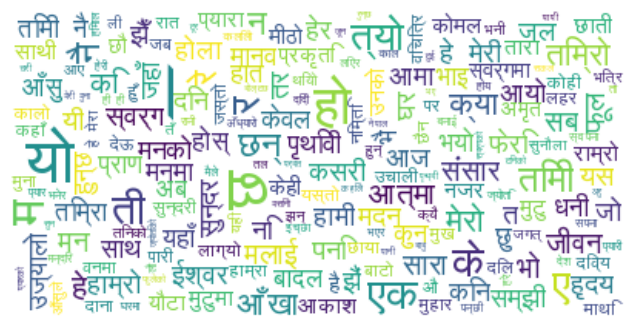

In [9]:
font_path = "font/gargi.ttf"

wordlcloud = WordCloud(max_font_size = 50,
                       max_words = 200,
                       font_path = font_path,
                       background_color = 'white',
                       regexp=r"[\u0900-\u097F]+" ).generate(poem)

count_words(poem)
count_lines(poem)

plt.figure(figsize=(8,4))
plt.imshow(wordlcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

### You can see the most frequent terms are stop-words.

# Preprocessing

### Split the corpus

In [10]:
poem_corpus = poem.split("\n")
print(poem_corpus[:5])

['नछाडी जानोस् हे मेरा प्राण ! अकेली मलाई,', 'मनको वनमा ननिभ्ने गरी विरह जलाई !', 'ननिभ्ने गरी विरह जलाई,', 'लोचनका तारा ! हे मेर प्यारा ! यो जोति  बिलाए !', 'के भनूँ? भन्ने म केही थिइन  विष नै पिलाए !']


## Pre Process

In [11]:
def remove_noise(sentences):
    punctuations = ['\n','\ufeff','0','1','2','3','4','5','6','7','8','9','०','१','२','३','४','५','६','७','८','९','१०','।', ',', ';', '?', ' !', "”",' ! ' '!', '—', '-', '.',"’","‘","'","–",'\u200d']
    processed_sentences = []
    for sentence in sentences:
        for punct in punctuations:
            sentence = sentence.replace(punct,'')
        processed_sentences.append(sentence)

    return processed_sentences

In [12]:
processed_poem_corpus = remove_noise(poem_corpus)
print(processed_poem_corpus[:5])

['नछाडी जानोस् हे मेरा प्राण अकेली मलाई', 'मनको वनमा ननिभ्ने गरी विरह जलाई', 'ननिभ्ने गरी विरह जलाई', 'लोचनका तारा हे मेर प्यारा यो जोति  बिलाए', 'के भनूँ भन्ने म केही थिइन  विष नै पिलाए']


### **WordCloud**

Word Count: 17765
Line Count: 4092


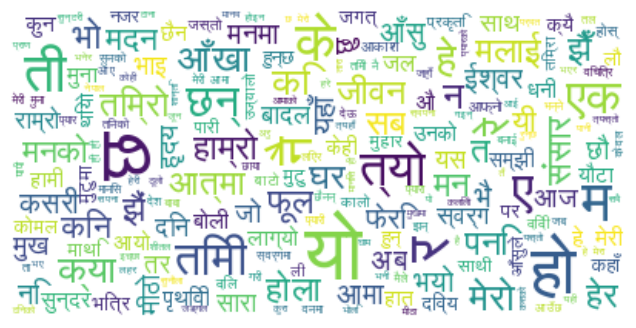

In [13]:
wordlcloud = WordCloud(max_font_size = 50,
                       max_words = 200,
                       font_path = font_path,
                       background_color = 'white',
                       regexp=r"[\u0900-\u097F]+" ).generate(''.join(processed_poem_corpus))

count_words(poem)
count_lines(poem)

plt.figure(figsize=(8,4))
plt.imshow(wordlcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# **Using Tokenizer**

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(processed_poem_corpus)
total_words = len(tokenizer.word_index) + 1

### Save Tokenizer for future Reference

In [15]:
tokenizer_json = tokenizer.to_json()
with open('model/tokenizer.json', 'w', encoding='utf-8') as json_file:
    json_file.write(tokenizer_json)

In [16]:
from tensorflow.keras.preprocessing.text import tokenizer_from_json
# Load the tokenizer from the JSON file
with open('model/tokenizer.json', 'r', encoding='utf-8') as json_file:
    tokenizer_json = json_file.read()
    tokenizer = tokenizer_from_json(tokenizer_json)

In [17]:
len(tokenizer.word_index)

8580

In [18]:
# Converting the text into embeddings
input_sequences = []
for line in processed_poem_corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	# print(token_list)
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
										maxlen=max_sequence_len,
										padding='pre'))

predictors, label = input_sequences[:, :-1], input_sequences[:, -1]

In [19]:
print(max_sequence_len)

11


In [20]:
print(processed_poem_corpus[1])
print(tokenizer.texts_to_sequences([processed_poem_corpus[1]]))
# print(input_sequences[0])
print(predictors[6])
print(label[6])

मनको वनमा ननिभ्ने गरी विरह जलाई
[[47, 114, 862, 115, 469, 1337]]
[ 0  0  0  0  0  0  0  0  0 47]
114


In [21]:
label = ku.to_categorical(label, num_classes=total_words+1)

In [22]:
predictors.shape

(14767, 10)

In [23]:
label.shape

(14767, 8582)

In [24]:
label[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

# Create LSTM model

In [25]:
!pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\silwa\.conda\envs\daks\lib\site-packages
Requires: tensorflow-intel
Required-by: retina-face


In [26]:
# Building a Bi-Directional LSTM Model
model = Sequential()
model.add(Embedding(total_words+1, 100,
					input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words+1/2, activation='relu',
				kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words+1, activation='softmax'))
model.compile(loss='categorical_crossentropy',
			optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           858200    
                                                                 
 bidirectional (Bidirection  (None, 10, 300)           301200    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 10, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 8581)              866681    
                                                                 
 dense_1 (Dense)             (None, 8582)              73650724  
                                                        

### **Train**

In [ ]:
history = model.fit(predictors, label, epochs=250, verbose=1)

Epoch 1/250
 71/462 [===>..........................] - ETA: 1:00:44 - loss: 9.0299 - accuracy: 0.0150

### **Save Model**

In [ ]:
model.save("model/nepali_lstm.h5")

### **Test**

In [9]:
from tensorflow.keras.preprocessing.text import tokenizer_from_json
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [10]:
max_sequence_len = 11

# Load Tokenizer and Models

In [11]:
with open('model/tokenizer.json', 'r', encoding='utf-8') as json_file:
    tokenizer_json = json_file.read()
    tokenizer = tokenizer_from_json(tokenizer_json)

In [12]:
model = load_model("model/nepali_lstm.h5")

In [ ]:
seed_text = "पृथ्वी"
next_words = 20
ouptut_text = ""

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)